In [1]:
import numpy as np

def diagonalize_matrix_advanced(matrix, decimals=4, verbose=True):
    """
    Diagonalize a matrix and return eigenvalues with eigenvectors.
    
    Parameters:
    matrix: 2D array-like
        The matrix to diagonalize
    decimals: int
        Number of decimal places to round results
    verbose: bool
        Whether to print formatted results
    
    Returns:
    dict: Dictionary containing eigenvalues and eigenvectors
    """
    matrix = np.array(matrix)
    
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be square")
    
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    # Prepare results
    results = {
        'matrix': matrix,
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors.T,  # Transpose to get eigenvectors as rows
        'verification': []
    }
    
    # Verify each eigenpair
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        verification = np.allclose(matrix @ eigenvec, eigenval * eigenvec)
        results['verification'].append(verification)
    
    if verbose:
        print(format_diagonalization(results, decimals))
    
    return results

def format_diagonalization(results, decimals=4):
    """Format the diagonalization results as a string"""
    output = []
    output.append("MATRIX DIAGONALIZATION")
    output.append("=" * 50)
    output.append(f"Input Matrix:\n{np.round(results['matrix'], decimals)}")
    output.append("")
    output.append("RESULTS:")
    output.append("-" * 30)
    
    for i, (eigenval, eigenvec) in enumerate(zip(results['eigenvalues'], results['eigenvectors'])):
        output.append(f"Eigenvalue {i+1}: {np.round(eigenval, decimals)}")
        output.append(f"Normalized Eigenvector {i+1}:")
        output.append(f"  {np.round(eigenvec, decimals)}")
        output.append(f"Verification (A·v = λ·v): {results['verification'][i]}")
        
        # Show magnitude of eigenvector (should be ~1.0 since normalized)
        magnitude = np.linalg.norm(eigenvec)
        output.append(f"Magnitude of eigenvector: {np.round(magnitude, decimals)}")
        output.append("")
    
    return "\n".join(output)



In [2]:
import numpy as np

def eigenvectors_to_ketbras(eigenvectors, decimals=4, verbose=True):
    """
    Treat eigenvectors as quantum states and compute ket-bra |ψ⟩⟨ψ| for each.
    
    Parameters:
    eigenvectors: array-like
        Array of eigenvectors (each row is an eigenvector)
    decimals: int
        Number of decimal places to round results
    verbose: bool
        Whether to print formatted results
    
    Returns:
    dict: Dictionary containing ket-bra matrices and other information
    """
    # Convert to numpy array and ensure we have 2D array
    eigenvectors = np.array(eigenvectors)
    
    # If eigenvectors are in columns instead of rows, transpose
    if eigenvectors.shape[0] < eigenvectors.shape[1]:
        eigenvectors = eigenvectors.T
    
    results = {
        'eigenvectors': eigenvectors,
        'ketbras': [],
        'trace_ketbras': [],
        'is_hermitian': [],
        'is_positive_semidefinite': []
    }
    
    # Calculate ket-bra for each eigenvector
    for i, psi in enumerate(eigenvectors):
        # Ensure psi is a column vector for outer product
        psi = psi.reshape(-1, 1)
        
        # Calculate ket-bra: |ψ⟩⟨ψ| = psi * psi^†
        ketbra = psi @ psi.conj().T
        
        results['ketbras'].append(ketbra)
        results['trace_ketbras'].append(np.trace(ketbra))
        results['is_hermitian'].append(np.allclose(ketbra, ketbra.conj().T))
        
        # Check if positive semidefinite (all eigenvalues >= 0)
        eigvals = np.linalg.eigvalsh(ketbra)  # Use eigh for Hermitian matrices
        results['is_positive_semidefinite'].append(np.all(eigvals >= -1e-10))
    
    if verbose:
        print(format_ketbra_results(results, decimals))
    
    return results

def format_ketbra_results(results, decimals=4):
    """Format the ket-bra results as a string"""
    output = []
    output.append("QUANTUM STATES: KET-BRA PROJECTORS")
    output.append("=" * 60)
    
    for i, (psi, ketbra) in enumerate(zip(results['eigenvectors'], results['ketbras'])):
        output.append(f"State {i+1}:")
        output.append(f"Eigenvector |ψ{i+1}⟩: {np.round(psi, decimals)}")
        output.append(f"Ket-Bra |ψ{i+1}⟩⟨ψ{i+1}|:")
        output.append(f"{np.round(ketbra, decimals)}")
        output.append(f"Trace: {np.round(results['trace_ketbras'][i], decimals)}")
        output.append(f"Hermitian: {results['is_hermitian'][i]}")
        output.append(f"Positive Semidefinite: {results['is_positive_semidefinite'][i]}")
        output.append("-" * 40)
    
    return "\n".join(output)

def complete_diagonalization_analysis(matrix, decimals=4):
    """
    Complete analysis: diagonalize matrix and compute ket-bras of eigenvectors.
    
    Parameters:
    matrix: 2D array-like
        Matrix to diagonalize
    decimals: int
        Number of decimal places to round results
    
    Returns:
    tuple: (diagonalization_results, ketbra_results)
    """
    # First diagonalize the matrix
    diag_results = diagonalize_matrix_advanced(matrix, decimals=decimals, verbose=False)
    
    # Then compute ket-bras
    ketbra_results = eigenvectors_to_ketbras(
        diag_results['eigenvectors'], 
        decimals=decimals, 
        verbose=False
    )
    
    # Print combined results
    print("COMPLETE QUANTUM SYSTEM ANALYSIS")
    print("=" * 70)
    print(format_diagonalization(diag_results, decimals))
    print("\n" + format_ketbra_results(ketbra_results, decimals))
    
    return diag_results, ketbra_results


In [3]:
# Example usage and demonstration
if __name__ == "__main__":
    # Test with the spin-1 Sx operator
    Sx = (1/2) * np.array([[0, np.sqrt(3), 0, 0], [np.sqrt(3), 0, 2, 0], [0, 2, 0, np.sqrt(3)], [0, 0, np.sqrt(3), 0]])
    
    print("Testing with spin-1 Sx operator:")
    print("Sx =", np.round(Sx, 4))
    print("\n")
    
    # Complete analysis
    diag_results, ketbra_results = complete_diagonalization_analysis(Sx, decimals=4)
    
    print("\n" + "="*80 + "\n")
    
    # Additional verification: Check orthogonality and completeness
    print("ORTHOGONALITY AND COMPLETENESS VERIFICATION:")
    print("-" * 50)
    
    eigenvectors = ketbra_results['eigenvectors']
    n_states = len(eigenvectors)
    
    # Check orthogonality
    print("Orthogonality check (⟨ψ_i|ψ_j⟩):")
    for i in range(n_states):
        for j in range(n_states):
            overlap = np.vdot(eigenvectors[i], eigenvectors[j])
            print(f"⟨ψ{i+1}|ψ{j+1}⟩ = {np.round(overlap, 6)}", end="  ")
        print()
    
    # Check completeness relation: sum of ket-bras should equal identity
    print(f"\nCompleteness relation verification:")
    identity_approx = sum(ketbra_results['ketbras'])
    identity_true = np.eye(Sx.shape[0])
    completeness_check = np.allclose(identity_approx, identity_true)
    print(f"∑|ψ_i⟩⟨ψ_i| = I: {completeness_check}")
    print(f"Sum of ket-bras:\n{np.round(identity_approx, 6)}")

Testing with spin-1 Sx operator:
Sx = [[0.    0.866 0.    0.   ]
 [0.866 0.    1.    0.   ]
 [0.    1.    0.    0.866]
 [0.    0.    0.866 0.   ]]


COMPLETE QUANTUM SYSTEM ANALYSIS
MATRIX DIAGONALIZATION
Input Matrix:
[[0.    0.866 0.    0.   ]
 [0.866 0.    1.    0.   ]
 [0.    1.    0.    0.866]
 [0.    0.    0.866 0.   ]]

RESULTS:
------------------------------
Eigenvalue 1: -1.5
Normalized Eigenvector 1:
  [ 0.3536 -0.6124  0.6124 -0.3536]
Verification (A·v = λ·v): True
Magnitude of eigenvector: 1.0

Eigenvalue 2: -0.5
Normalized Eigenvector 2:
  [ 0.6124 -0.3536 -0.3536  0.6124]
Verification (A·v = λ·v): True
Magnitude of eigenvector: 1.0

Eigenvalue 3: 1.5
Normalized Eigenvector 3:
  [-0.3536 -0.6124 -0.6124 -0.3536]
Verification (A·v = λ·v): True
Magnitude of eigenvector: 1.0

Eigenvalue 4: 0.5
Normalized Eigenvector 4:
  [-0.6124 -0.3536  0.3536  0.6124]
Verification (A·v = λ·v): True
Magnitude of eigenvector: 1.0


QUANTUM STATES: KET-BRA PROJECTORS
State 1:
Eigenvector |ψ1⟩

In [4]:
import numpy as np
import sympy as sp
from fractions import Fraction

def analytic_time_evolution(initial_state, eigenvectors, eigenvalues, time_var='t', use_sqrt_notation=True):
    """
    Calculate analytic time evolution of a quantum state.
    
    Parameters:
    initial_state: array-like
        Initial quantum state vector
    eigenvectors: array-like
        Eigenvectors of the Hamiltonian (each row is an eigenvector)
    eigenvalues: array-like
        Corresponding eigenvalues of the Hamiltonian
    time_var: str
        Symbol to use for time variable
    use_sqrt_notation: bool
        Whether to use square root notation for fractions
    
    Returns:
    dict: Analytic expression for time evolution
    """
    t = sp.Symbol(time_var, real=True)
    initial_state = np.array(initial_state, dtype=complex)
    eigenvectors = np.array(eigenvectors, dtype=complex)
    
    # Ensure eigenvectors are in rows
    if eigenvectors.shape[0] < eigenvectors.shape[1]:
        eigenvectors = eigenvectors.T
    
    # Project initial state onto energy eigenbasis
    coefficients = []
    for i, eigenvec in enumerate(eigenvectors):
        # ⟨E_i|ψ(0)⟩
        coeff = np.vdot(eigenvec, initial_state)
        coefficients.append(coeff)
    
    # Time evolution: |ψ(t)⟩ = Σ c_i e^(-i E_i t/ℏ) |E_i⟩
    # (Assuming ℏ = 1 for simplicity)
    evolved_state = np.zeros_like(initial_state, dtype=object)
    
    for i, (coeff, eigenval, eigenvec) in enumerate(zip(coefficients, eigenvalues, eigenvectors)):
        phase = sp.exp(-sp.I * eigenval * t)
        component = coeff * phase * eigenvec
        evolved_state += component
    
    # Convert to symbolic expressions with pretty formatting
    symbolic_state = []
    for component in evolved_state:
        if use_sqrt_notation:
            symbolic_component = convert_to_sqrt_notation(sp.simplify(component))
        else:
            symbolic_component = sp.simplify(component)
        symbolic_state.append(symbolic_component)
    
    results = {
        'initial_state': initial_state,
        'coefficients': coefficients,
        'evolved_state': evolved_state,
        'symbolic_state': symbolic_state,
        'time_variable': t,
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors
    }
    
    return results

def convert_to_sqrt_notation(expr):
    """
    Convert numeric fractions to square root notation when possible.
    """
    # Common square root values
    sqrt_replacements = {
        sp.Rational(1, 2): sp.Symbol('1/2'),
        sp.sqrt(2)/2: sp.Symbol('√2/2'),
        sp.sqrt(3)/2: sp.Symbol('√3/2'),
        sp.sqrt(2)/4: sp.Symbol('√2/4'),
        sp.sqrt(3)/4: sp.Symbol('√3/4'),
        1/sp.sqrt(2): sp.Symbol('1/√2'),
    }
    
    # Try to match common patterns
    for decimal, symbolic in sqrt_replacements.items():
        if expr == decimal:
            return symbolic
        elif expr == -decimal:
            return -symbolic
        elif expr == decimal * sp.I:
            return symbolic * sp.I
        elif expr == -decimal * sp.I:
            return -symbolic * sp.I
    
    return expr

def time_dependent_overlap(evolved_state_results, final_state, time_var='t'):
    """
    Calculate overlap between time-evolved state and a final state.
    
    Parameters:
    evolved_state_results: dict
        Results from analytic_time_evolution
    final_state: array-like
        Target quantum state vector
    time_var: str
        Time variable symbol
    
    Returns:
    dict: Overlap information
    """
    final_state = np.array(final_state, dtype=complex)
    t = sp.Symbol(time_var, real=True)
    
    # Calculate overlap: ⟨φ|ψ(t)⟩
    overlap = 0
    for i, (psi_t, phi) in enumerate(zip(evolved_state_results['symbolic_state'], final_state)):
        overlap += phi.conjugate() * psi_t
    
    # Simplify the expression
    simplified_overlap = sp.simplify(overlap)
    
    # Calculate probability |⟨φ|ψ(t)⟩|²
    probability = sp.simplify(sp.Abs(simplified_overlap)**2)
    
    results = {
        'overlap_amplitude': simplified_overlap,
        'probability': probability,
        'final_state': final_state,
        'time_variable': t
    }
    
    return results

def format_quantum_expression(expr):
    """
    Format quantum expressions with nice LaTeX-like output.
    """
    if hasattr(expr, '__iter__'):
        return [format_quantum_expression(e) for e in expr]
    
    expr_str = str(expr)
    
    # Replace common symbols with nicer notation
    replacements = {
        '1/2': '½',
        'sqrt(2)': '√2',
        'sqrt(3)': '√3',
        'I': 'i',
        'exp': 'e',
        '**': '^'
    }
    
    for old, new in replacements.items():
        expr_str = expr_str.replace(old, new)
    
    return expr_str

def pretty_print_evolution(evolution_results, overlap_results=None):
    """
    Pretty print the time evolution results.
    """
    print("QUANTUM TIME EVOLUTION ANALYSIS")
    print("=" * 70)
    
    print("\nINITIAL STATE:")
    print("|ψ(0)⟩ =", format_quantum_expression(evolution_results['initial_state']))
    
    print("\nENERGY EIGENVALUES:")
    for i, evalue in enumerate(evolution_results['eigenvalues']):
        print(f"E_{i+1} = {evalue}")
    
    print("\nEXPANSION COEFFICIENTS:")
    for i, coeff in enumerate(evolution_results['coefficients']):
        pretty_coeff = convert_to_sqrt_notation(sp.simplify(coeff))
        print(f"c_{i+1} = ⟨E_{i+1}|ψ(0)⟩ = {pretty_coeff}")
    
    print("\nTIME-EVOLVED STATE:")
    print("|ψ(t)⟩ =")
    for i, component in enumerate(evolution_results['symbolic_state']):
        print(f"  [{format_quantum_expression(component)}]")
    
    if overlap_results:
        print("\nOVERLAP WITH FINAL STATE:")
        print("⟨φ|ψ(t)⟩ =", format_quantum_expression(overlap_results['overlap_amplitude']))
        print("P(t) = |⟨φ|ψ(t)⟩|² =", format_quantum_expression(overlap_results['probability']))


def get_numeric_probability(overlap_results, time_value):
    """
    Get numeric probability at a specific time.
    """
    t = overlap_results['time_variable']
    prob_expr = overlap_results['probability']
    return float(prob_expr.subs(t, time_value).evalf())

# Additional utility function
def plot_time_evolution(overlap_results, time_range=(0, 4*np.pi), num_points=1000):
    """
    Plot the time-dependent probability (requires matplotlib).
    """
    try:
        import matplotlib.pyplot as plt
        
        t = overlap_results['time_variable']
        prob_expr = overlap_results['probability']
        
        times = np.linspace(time_range[0], time_range[1], num_points)
        probabilities = [float(prob_expr.subs(t, time).evalf()) for time in times]
        
        plt.figure(figsize=(10, 6))
        plt.plot(times, probabilities, 'b-', linewidth=2)
        plt.xlabel('Time')
        plt.ylabel('Probability |⟨φ|ψ(t)⟩|²')
        plt.title('Time Evolution of Quantum State Overlap')
        plt.grid(True, alpha=0.3)
        plt.show()
        
    except ImportError:
        print("Matplotlib not available for plotting")

In [11]:
# Example usage with the spin-1 Sx operator
if __name__ == "__main__":
    # Define the spin-1 Sx operator and its diagonalization
    Sx = (1/np.sqrt(2)) * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
    
    # Diagonalize Sx
    eigenvalues, eigenvectors = np.linalg.eig(Sx)
    
    # Sort by eigenvalues for consistency
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    print("Spin-1 S_x Operator Analysis")
    print("S_x = 1/√2 * [[0, 1, 0], [1, 0, 1], [0, 1, 0]]")
    print(f"Eigenvalues: {eigenvalues}")
    print()
    
    # Test 1: Time evolution from |1⟩ state to check oscillation
    initial_state = np.array([0, 1, 0])  # |1⟩ state
    final_state = np.array([0, 0, 1])    # |-1⟩ state
    
    print("Example 1: Time evolution from |1⟩ state")
    print("-" * 50)
    
    # Calculate time evolution
    evolution = analytic_time_evolution(initial_state, eigenvectors.T, eigenvalues)
    
    # Calculate overlap with final state
    overlap = time_dependent_overlap(evolution, final_state)
    
    # Pretty print results
    pretty_print_evolution(evolution, overlap)
    
    print("\n" + "="*80 + "\n")
    
    # Test 2: Time evolution from symmetric state
    print("Example 2: Time evolution from symmetric state |0⟩")
    print("-" * 50)
    
    initial_state2 = np.array([0, 1, 0])  # |0⟩ state
    evolution2 = analytic_time_evolution(initial_state2, eigenvectors.T, eigenvalues)
    pretty_print_evolution(evolution2)
    
    print("\n" + "="*80 + "\n")
    
    # Test 3: Specific time points
    print("Example 3: Probabilities at specific times")
    print("-" * 50)
    
    t_val = sp.Symbol('t')
    prob_expr = overlap['probability']
    
    # Evaluate at specific times
    times = [0, np.pi/4, np.pi/2, np.pi, 2*np.pi]
    for time in times:
        prob_at_t = prob_expr.subs(t_val, time)
        simplified_prob = sp.simplify(prob_at_t)
        print(f"P(t={time:.3f}) = {simplified_prob}")

Spin-1 S_x Operator Analysis
S_x = 1/√2 * [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
Eigenvalues: [-1.00000000e+00  1.32696919e-17  1.00000000e+00]

Example 1: Time evolution from |1⟩ state
--------------------------------------------------
QUANTUM TIME EVOLUTION ANALYSIS

INITIAL STATE:
|ψ(0)⟩ = ['0j', '(1+0j)', '0j']

ENERGY EIGENVALUES:
E_1 = -0.9999999999999994
E_2 = 1.3269691946519348e-17
E_3 = 1.0

EXPANSION COEFFICIENTS:
c_1 = ⟨E_1|ψ(0)⟩ = -0.707106781186548
c_2 = ⟨E_2|ψ(0)⟩ = -1.21384442917600E-17
c_3 = ⟨E_3|ψ(0)⟩ = 0.707106781186548

TIME-EVOLVED STATE:
|ψ(t)⟩ =
  [-0.353553390593274*e(1.0*i*t) - 8.58317627175863e-18 + 0.353553390593274*e(-1.0*i*t)]
  [0.5*e(1.0*i*t) + 1.47341829824161e-34 + 0.5*e(-1.0*i*t)]
  [-0.353553390593274*e(1.0*i*t) + 8.58317627175863e-18 + 0.353553390593274*e(-1.0*i*t)]

OVERLAP WITH FINAL STATE:
⟨φ|ψ(t)⟩ = -0.353553390593274*e(1.0*i*t) + 8.58317627175863e-18 + 0.353553390593274*e(-1.0*i*t)
P(t) = |⟨φ|ψ(t)⟩|² = -3.03461107294e-18*e(0.999999999999999*i*t) + 3.0

EXAMPLE 1: Spin-1 Sx Operator
QUANTUM TIME EVOLUTION ANALYSIS

TIME EVOLUTION MATRIX:
[[0.     0.7071 0.    ]
 [0.7071 0.     0.7071]
 [0.     0.7071 0.    ]]

EIGENVALUES:
  λ_1 = -1.0
  λ_2 = 0.0
  λ_3 = 1.0

INITIAL STATE |ψ(0)⟩:
  [1.+0.j 0.+0.j 0.+0.j]

FINAL STATE |φ⟩:
  [0.+0.j 0.+0.j 1.+0.j]

EXPANSION COEFFICIENTS:
  c_1 = (0.5+0j)
  c_2 = (0.7071+0j)
  c_3 = (0.5+0j)

TIME-EVOLVED STATE |ψ(t)⟩:
  [0.25*exp(1.0*I*t) + 0.5 + 0.25*exp(-1.0*I*t)]
  [-0.353553390593274*exp(1.0*I*t) - 8.58317627175863e-18 + 0.353553390593274*exp(-1.0*I*t)]
  [0.25*exp(1.0*I*t) - 0.5 + 0.25*exp(-1.0*I*t)]

OVERLAP AMPLITUDE:
  ⟨φ|ψ(t)⟩ = 0.25*exp(1.0*I*t) - 0.5 + 0.25*exp(-1.0*I*t)

TRANSITION PROBABILITY:
  P(t) = |⟨φ|ψ(t)⟩|² = -0.25*cos(1.0*t) - 0.25*cos(1.0*t) + 0.125*cos(2.0*t) + 0.375


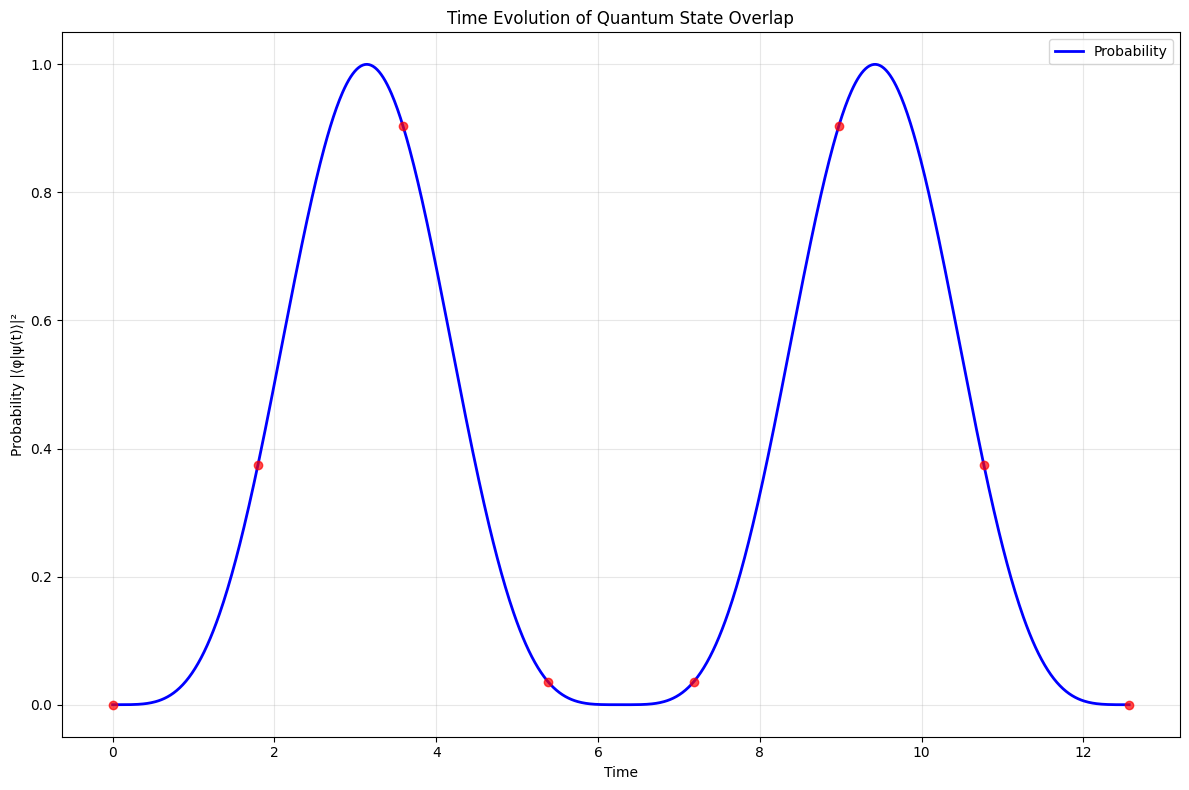


KEY TIME POINTS ANALYSIS:
----------------------------------------
Time		Probability
------------------------------
  0.0000	0.000000
  1.5708	0.250000
  3.1416	1.000000
  4.7124	0.250000
  6.2832	0.000000
  9.4248	1.000000
 12.5664	0.000000


In [12]:
import numpy as np
import sympy as sp

def analyze_time_evolution(time_evolution_matrix, initial_state, final_state, 
                         time_range=(0, 4*np.pi), time_var='t', decimals=4):
    """
    Complete analysis of quantum time evolution and overlap.
    """
    # Diagonalize the time evolution matrix (Hamiltonian)
    eigenvalues, eigenvectors = np.linalg.eig(time_evolution_matrix)
    
    # Sort by eigenvalues for consistency
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Calculate analytic time evolution
    evolution_results = analytic_time_evolution(initial_state, eigenvectors.T, eigenvalues, time_var)
    
    # Calculate overlap with final state
    overlap_results = time_dependent_overlap(evolution_results, final_state, time_var)
    
    # Print all information
    print_time_evolution_info(evolution_results, overlap_results, time_evolution_matrix, decimals)
    
    # Plot the time evolution
    plot_time_evolution(overlap_results, time_range)
    
    # Calculate and display key time points
    analyze_key_time_points(overlap_results, time_range)
    
    return {
        'evolution': evolution_results,
        'overlap': overlap_results,
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors
    }

def analytic_time_evolution(initial_state, eigenvectors, eigenvalues, time_var='t'):
    """
    Calculate analytic time evolution of a quantum state.
    """
    t = sp.Symbol(time_var, real=True)
    initial_state = np.array(initial_state, dtype=complex)
    eigenvectors = np.array(eigenvectors, dtype=complex)
    
    if eigenvectors.shape[0] < eigenvectors.shape[1]:
        eigenvectors = eigenvectors.T
    
    coefficients = []
    for i, eigenvec in enumerate(eigenvectors):
        coeff = np.vdot(eigenvec, initial_state)
        coefficients.append(coeff)
    
    evolved_state = np.zeros_like(initial_state, dtype=object)
    for i, (coeff, eigenval, eigenvec) in enumerate(zip(coefficients, eigenvalues, eigenvectors)):
        phase = sp.exp(-sp.I * eigenval * t)
        component = coeff * phase * eigenvec
        evolved_state += component
    
    symbolic_state = []
    for component in evolved_state:
        symbolic_component = sp.simplify(component)
        symbolic_state.append(symbolic_component)
    
    return {
        'initial_state': initial_state,
        'coefficients': coefficients,
        'evolved_state': evolved_state,
        'symbolic_state': symbolic_state,
        'time_variable': t,
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors
    }

def time_dependent_overlap(evolved_state_results, final_state, time_var='t'):
    """
    Calculate overlap between time-evolved state and a final state.
    """
    final_state = np.array(final_state, dtype=complex)
    t = sp.Symbol(time_var, real=True)
    
    overlap = 0
    for i, (psi_t, phi) in enumerate(zip(evolved_state_results['symbolic_state'], final_state)):
        overlap += phi.conjugate() * psi_t
    
    simplified_overlap = sp.simplify(overlap)
    
    # Ensure probability is real by taking the magnitude squared properly
    probability = sp.simplify(sp.re(simplified_overlap * sp.conjugate(simplified_overlap)))
    
    return {
        'overlap_amplitude': simplified_overlap,
        'probability': probability,
        'final_state': final_state,
        'time_variable': t
    }

def get_numeric_probability(overlap_results, time_value):
    """
    Get numeric probability at a specific time.
    """
    t = overlap_results['time_variable']
    prob_expr = overlap_results['probability']
    
    # Substitute time value and ensure we get a real number
    result = prob_expr.subs(t, time_value)
    
    # Simplify and convert to float
    if result.is_real:
        return float(result.evalf())
    else:
        # If it's not explicitly real, take the real part
        return float(sp.re(result).evalf())

def plot_time_evolution(overlap_results, time_range=(0, 4*np.pi), num_points=1000):
    """
    Plot the time-dependent probability.
    """
    try:
        import matplotlib.pyplot as plt
        
        t = overlap_results['time_variable']
        prob_expr = overlap_results['probability']
        
        times = np.linspace(time_range[0], time_range[1], num_points)
        
        # Use a safer approach for numeric evaluation
        probabilities = []
        for time_val in times:
            try:
                prob = get_numeric_probability(overlap_results, time_val)
                probabilities.append(prob)
            except (TypeError, ValueError) as e:
                # If there's still an issue, use a fallback
                result = prob_expr.subs(t, time_val)
                if hasattr(result, 'evalf'):
                    prob_val = result.evalf()
                    if prob_val.is_real:
                        probabilities.append(float(prob_val))
                    else:
                        probabilities.append(float(sp.re(prob_val)))
                else:
                    probabilities.append(0.0)
        
        plt.figure(figsize=(12, 8))
        plt.plot(times, probabilities, 'b-', linewidth=2, label='Probability')
        plt.xlabel('Time')
        plt.ylabel('Probability |⟨φ|ψ(t)⟩|²')
        plt.title('Time Evolution of Quantum State Overlap')
        plt.grid(True, alpha=0.3)
        
        # Add key time points to the plot
        key_times = np.linspace(time_range[0], time_range[1], 8)
        for t_val in key_times:
            prob_val = get_numeric_probability(overlap_results, t_val)
            plt.plot(t_val, prob_val, 'ro', markersize=6, alpha=0.7)
        
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    except ImportError:
        print("Matplotlib not available for plotting")

def print_time_evolution_info(evolution_results, overlap_results, matrix, decimals=4):
    """
    Print comprehensive information about the time evolution.
    """
    print("QUANTUM TIME EVOLUTION ANALYSIS")
    print("=" * 70)
    
    print(f"\nTIME EVOLUTION MATRIX:")
    print(np.round(matrix, decimals))
    
    print(f"\nEIGENVALUES:")
    for i, evalue in enumerate(evolution_results['eigenvalues']):
        print(f"  λ_{i+1} = {np.round(evalue, decimals)}")
    
    print(f"\nINITIAL STATE |ψ(0)⟩:")
    print(f"  {np.round(evolution_results['initial_state'], decimals)}")
    
    print(f"\nFINAL STATE |φ⟩:")
    print(f"  {np.round(overlap_results['final_state'], decimals)}")
    
    print(f"\nEXPANSION COEFFICIENTS:")
    for i, coeff in enumerate(evolution_results['coefficients']):
        print(f"  c_{i+1} = {np.round(coeff, decimals)}")
    
    print(f"\nTIME-EVOLVED STATE |ψ(t)⟩:")
    for i, component in enumerate(evolution_results['symbolic_state']):
        simple_comp = sp.simplify(component)
        print(f"  [{simple_comp}]")
    
    print(f"\nOVERLAP AMPLITUDE:")
    print(f"  ⟨φ|ψ(t)⟩ = {overlap_results['overlap_amplitude']}")
    
    print(f"\nTRANSITION PROBABILITY:")
    print(f"  P(t) = |⟨φ|ψ(t)⟩|² = {overlap_results['probability']}")

def analyze_key_time_points(overlap_results, time_range):
    """
    Analyze and print probabilities at key time points.
    """
    print(f"\nKEY TIME POINTS ANALYSIS:")
    print("-" * 40)
    
    start, end = time_range
    time_points = [
        start,
        (end - start) * 0.25,
        (end - start) * 0.5,
        (end - start) * 0.75,
        end
    ]
    
    if end >= 2*np.pi:
        pi_points = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
        time_points = list(set(time_points + pi_points))
        time_points.sort()
    
    print("Time\t\tProbability")
    print("-" * 30)
    for t_val in time_points:
        prob = get_numeric_probability(overlap_results, t_val)
        print(f"{t_val:8.4f}\t{prob:8.6f}")

# Example usage
if __name__ == "__main__":
    # Example 1: Spin-1 Sx operator
    print("EXAMPLE 1: Spin-1 Sx Operator")
    print("=" * 50)
    
    Sx = (1/np.sqrt(2)) * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
    initial_state = np.array([1, 0, 0])
    final_state = np.array([0, 0, 1])
    
    results = analyze_time_evolution(
        time_evolution_matrix=Sx,
        initial_state=initial_state,
        final_state=final_state,
        time_range=(0, 4*np.pi)
    )

QUANTUM TIME EVOLUTION ANALYSIS

TIME EVOLUTION MATRIX:
[[0.     0.7071 0.    ]
 [0.7071 0.     0.7071]
 [0.     0.7071 0.    ]]

EIGENVALUES:
  λ_1 = -1.0
  λ_2 = 0.0
  λ_3 = 1.0

INITIAL STATE |ψ(0)⟩:
  [1.+0.j 0.+0.j 0.+0.j]

FINAL STATE |φ⟩:
  [0.+0.j 0.+0.j 1.+0.j]

EXPANSION COEFFICIENTS:
  c_1 = (0.5+0j)
  c_2 = (0.7071+0j)
  c_3 = (0.5+0j)

TIME-EVOLVED STATE |ψ(t)⟩:
  [0.25*exp(1.0*I*t) + 0.5 + 0.25*exp(-1.0*I*t)]
  [-0.353553390593274*exp(1.0*I*t) - 8.58317627175863e-18 + 0.353553390593274*exp(-1.0*I*t)]
  [0.25*exp(1.0*I*t) - 0.5 + 0.25*exp(-1.0*I*t)]

OVERLAP AMPLITUDE:
  ⟨φ|ψ(t)⟩ = 0.25*exp(1.0*I*t) - 0.5 + 0.25*exp(-1.0*I*t)

TRANSITION PROBABILITY:
  P(t) = |⟨φ|ψ(t)⟩|² = -0.25*cos(1.0*t) - 0.25*cos(1.0*t) + 0.125*cos(2.0*t) + 0.375


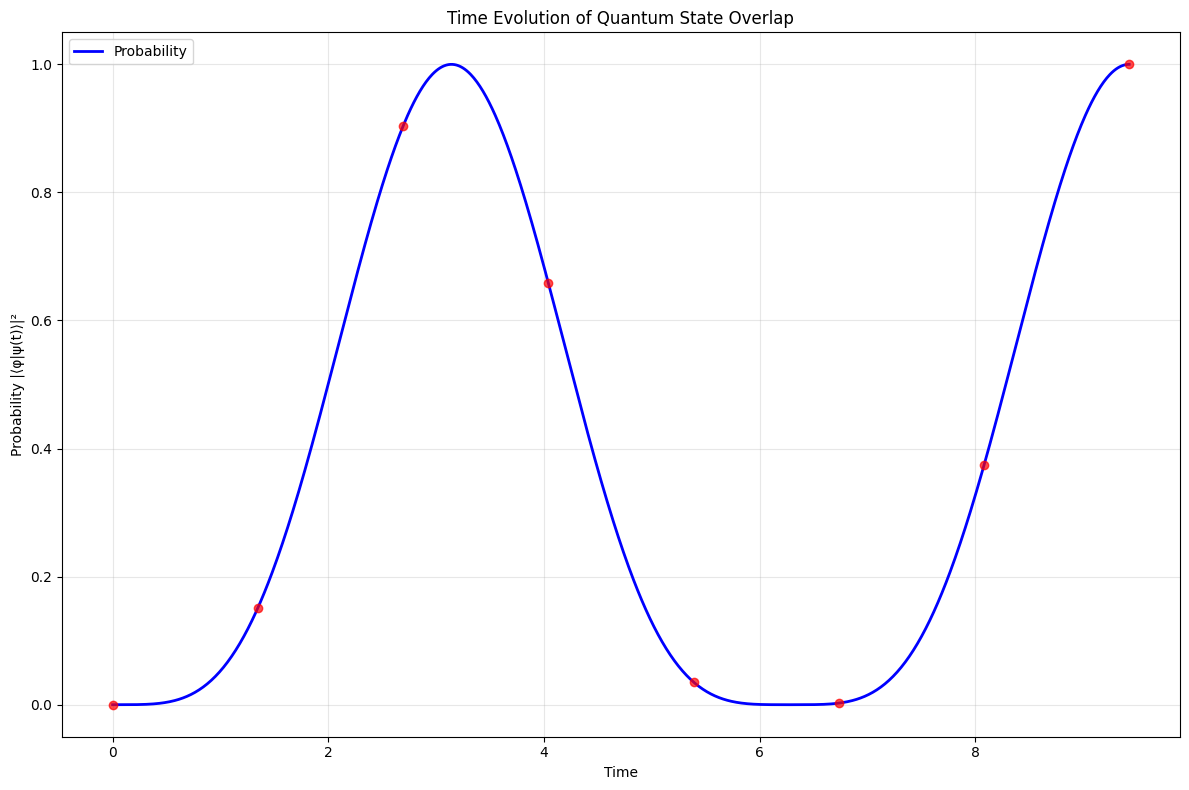


KEY TIME POINTS ANALYSIS:
----------------------------------------
Time		Probability
------------------------------
  0.0000	0.000000
  1.5708	0.250000
  2.3562	0.728553
  3.1416	1.000000
  4.7124	0.250000
  6.2832	0.000000
  7.0686	0.021447
  9.4248	1.000000


In [16]:
# Simple usage for your quantum system
Sx = (1/np.sqrt(2)) * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
initial = [1, 0, 0]
final = [0, 0, 1]

results = analyze_time_evolution(Sx, initial, final, time_range=(0, 3*np.pi))

QUANTUM TIME EVOLUTION ANALYSIS

TIME EVOLUTION MATRIX:
[[0.    0.866 0.    0.   ]
 [0.866 0.    1.    0.   ]
 [0.    1.    0.    0.866]
 [0.    0.    0.866 0.   ]]

EIGENVALUES:
  λ_1 = -1.5
  λ_2 = -0.5
  λ_3 = 0.5
  λ_4 = 1.5

INITIAL STATE |ψ(0)⟩:
  [0.7071+0.j 0.7071+0.j 0.    +0.j 0.    +0.j]

FINAL STATE |φ⟩:
  [0.    +0.j 0.    +0.j 0.7071+0.j 0.7071+0.j]

EXPANSION COEFFICIENTS:
  c_1 = (-0.183+0j)
  c_2 = (0.183+0j)
  c_3 = (-0.683+0j)
  c_4 = (-0.683+0j)

TIME-EVOLVED STATE |ψ(t)⟩:
  [0.112071934021006*exp(0.499999999999999*I*t) - 0.0647047612756302*exp(1.5*I*t) + 0.241481456572267*exp(-1.5*I*t) + 0.418258151868904*exp(-0.5*I*t)]
  [-0.0647047612756301*exp(0.499999999999999*I*t) + 0.112071934021007*exp(1.5*I*t) + 0.418258151868904*exp(-1.5*I*t) + 0.241481456572267*exp(-0.5*I*t)]
  [-0.06470476127563*exp(0.499999999999999*I*t) - 0.112071934021007*exp(1.5*I*t) + 0.418258151868904*exp(-1.5*I*t) - 0.241481456572267*exp(-0.5*I*t)]
  [0.112071934021006*exp(0.499999999999999*I*t) +

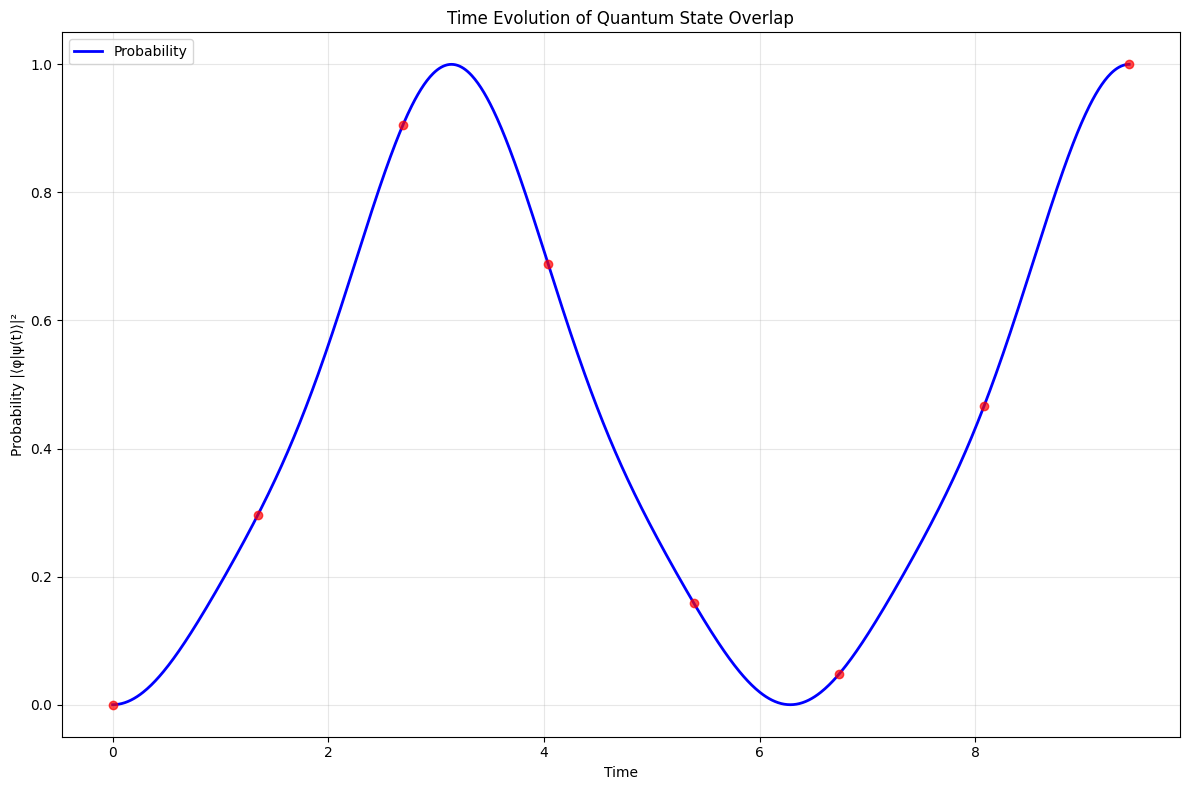


KEY TIME POINTS ANALYSIS:
----------------------------------------
Time		Probability
------------------------------
  0.0000	0.000000
  1.5708	0.375000
  2.3562	0.746859
  3.1416	1.000000
  4.7124	0.375000
  6.2832	0.000000
  7.0686	0.128141
  9.4248	1.000000


In [24]:
# Simple usage for your quantum system
Sx = (1/2) * np.array([[0, np.sqrt(3), 0, 0], [np.sqrt(3), 0, 2, 0], [0, 2, 0, np.sqrt(3)], [0, 0, np.sqrt(3), 0]])
initial = np.array([1, 1, 0, 0]) / np.sqrt(2)
final = np.array([0, 0, 1, 1]) / np.sqrt(2)



results = analyze_time_evolution(Sx, initial, final, time_range=(0, 3*np.pi))